# Convex Optimization, HW 10, Chao Ni

In [1]:
import numpy as np
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt, imread
import imread

In [2]:
pokemon = pd.read_csv('pokemon.csv')
pokemon_move = pd.read_csv('pokemon_moves.csv')
type_list = ['normal','fire','fighting','water','flying','grass','poison',
             'electric','ground','psychic','rock','ice','bug','dragon',
             'ghost','dark','steel','fairy']

# (a) Converting to the matrix B

In [3]:
B = np.zeros((len(pokemon),len(type_list)))
for i in range(len(pokemon)):
    if pokemon.loc[i,'type1'] in type_list:
        B[i,type_list.index(pokemon.loc[i,'type1'])]=1
    if pokemon.loc[i,'type2'] in type_list:
        B[i,type_list.index(pokemon.loc[i,'type2'])]=1

# (b) Creating a matrix M

In [4]:
n_move = 728;
M = np.zeros((n_move,len(pokemon)))
for i in range(len(pokemon_move)):
    if (pokemon_move.loc[i,'pokemon_id']>=802):
        break
    M[int(pokemon_move.loc[i,'move_id']-1), int(pokemon_move.loc[i,'pokemon_id']-1)] = 1


## Test the matrix  B and M are corrent

In [5]:
M_std = pd.read_csv('ex10_pokemon_moves.csv',header=None)
B_std = pd.read_csv('ex10_pokemon_types.csv',header=None)
print('B difference in Frobenius norm:',np.linalg.norm(B_std.values - B))
print('M difference in Frobenius norm:',np.linalg.norm(M_std.values - M))

B difference in Frobenius norm: 0.0
M difference in Frobenius norm: 0.0


# (c,d) Implementing the logistic regression and return the TP, TN, FP, FN

## Snorlax test
We train the model with first type normal, (let i=0), and yes the classifier return the Snorlax, which is indexed 142, a normal-type

In [6]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_hat)): 
        if (y_actual[i]==y_hat[i]==1):
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1
    return(TP, FP, TN, FN)

In [7]:
n_train = 400
df = pd.DataFrame()
for i in range(18):
    name = type_list[i]
    
    beta = cp.Variable(n_move)
    mid = M[:,0:n_train].T @ beta
    log_likelihood = cp.sum(cp.multiply(B[0:n_train,i], mid) - cp.logistic(mid))
    problem = cp.Problem(cp.Maximize(log_likelihood))
    problem.solve(solver='ECOS',verbose=False)
#     print('solve status',problem.status)
    if problem.status not in ["infeasible", "unbounded","infeasible_inaccurate","unbounded_inaccurate"]:
        TP,FP,TN,FN = perf_measure(B[n_train:801,i],(1+np.sign((M[:,n_train:801].T@beta).value))/2)
        acc = (TP+TN)/(TP+TN+FP+FN)
        new_row = {'name':name,'TP':TP,'TN':TN,'FP':FP,'FN':FN,'ACC':acc}
        df = df.append(new_row,ignore_index=True,sort=False)


SolverError: Problem could not be reduced to a QP, and no conic solvers exist among candidate solvers ({'qp_solvers': [], 'conic_solvers': []}).

In [12]:
 # 142 for Snorlax, only use when beta is trained with label "normal", i.e. i=0
print((1+np.sign((M[:,142].T@beta).value))/2)

1.0


## with training number 400

In [10]:
df

,ACC,FN,FP,TN,TP,name
0,0.875312,16.0,34.0,318.0,33.0,normal
1,0.932668,10.0,17.0,352.0,22.0,fire
2,0.912718,25.0,10.0,358.0,8.0,fighting
3,0.927681,7.0,22.0,330.0,42.0,water
4,0.917706,16.0,17.0,339.0,29.0,flying
5,0.892768,33.0,10.0,338.0,20.0,grass
6,0.832918,12.0,55.0,324.0,10.0,poison
7,0.947631,7.0,14.0,361.0,19.0,electric
8,0.897756,20.0,21.0,354.0,6.0,ground
9,0.815461,4.0,70.0,293.0,34.0,psychic


# (e) Which is most accurate?

Based on the accuracy measurement I defined, dragon is the type for which the classifier is the most accurate, and poison is the least accurate. 

Unfortunately I don't have lots of knowledge about Pokeman. Based on my limited experience, I think dragon type is rare and poison is quite common in Pokeman, which means lots of different pokeman have this function.

# (f) Plot for different training data

Besides three ratios indicated in the homework, I also include another ratio defined as $r_4=\frac{TP+TN}{TP+TN+FP+FN}$

From the pictures and the tables we ploted already, we found that most of samples are ture negative. And the rest three categories are relatively random. For $r_1$, if it is smaller, it means the false positive are relatively smaller, which means a higher precision. For $r_2$, it it is smaller, it also means the classifier is relatively more accurate in term of higher precision in recognizing negativeness. But because true negative is big and $r_2$ is thus always small, and the difference between training numbers are relatively trivial. And $r_3$ in some sense combines the previous two measurements, which I think is the best of three. And I also propose another performance measurement $r_4$.


solve status optimal
solve status optimal
solve status optimal_inaccurate
solve status optimal
solve status optimal_inaccurate
solve status optimal_inaccurate
solve status optimal_inaccurate
solve status optimal
solve status optimal
solve status optimal_inaccurate
solve status optimal
solve status optimal
solve status optimal_inaccurate
solve status optimal_inaccurate
solve status optimal
solve status optimal
solve status optimal_inaccurate
solve status optimal
solve status optimal
solve status optimal_inaccurate
solve status optimal_inaccurate
solve status optimal
solve status optimal
solve status optimal_inaccurate
solve status optimal
solve status optimal_inaccurate
solve status optimal_inaccurate
solve status optimal_inaccurate
solve status optimal
solve status optimal_inaccurate
solve status optimal_inaccurate
solve status optimal
solve status optimal_inaccurate
solve status optimal_inaccurate
solve status optimal_inaccurate
solve status optimal
solve status optimal
solve status o

solve status optimal
WARN: A->p (column pointers) not strictly increasing, column 164 empty
WARN: A->p (column pointers) not strictly increasing, column 165 empty
WARN: A->p (column pointers) not strictly increasing, column 166 empty
WARN: A->p (column pointers) not strictly increasing, column 176 empty
WARN: A->p (column pointers) not strictly increasing, column 207 empty
WARN: A->p (column pointers) not strictly increasing, column 220 empty
WARN: A->p (column pointers) not strictly increasing, column 291 empty
WARN: A->p (column pointers) not strictly increasing, column 293 empty
WARN: A->p (column pointers) not strictly increasing, column 294 empty
WARN: A->p (column pointers) not strictly increasing, column 295 empty
WARN: A->p (column pointers) not strictly increasing, column 301 empty
WARN: A->p (column pointers) not strictly increasing, column 352 empty
WARN: A->p (column pointers) not strictly increasing, column 353 empty
WARN: A->p (column pointers) not strictly increasing, co

solve status optimal
WARN: A->p (column pointers) not strictly increasing, column 164 empty
WARN: A->p (column pointers) not strictly increasing, column 293 empty
WARN: A->p (column pointers) not strictly increasing, column 294 empty
WARN: A->p (column pointers) not strictly increasing, column 295 empty
WARN: A->p (column pointers) not strictly increasing, column 301 empty
WARN: A->p (column pointers) not strictly increasing, column 352 empty
WARN: A->p (column pointers) not strictly increasing, column 353 empty
WARN: A->p (column pointers) not strictly increasing, column 390 empty
WARN: A->p (column pointers) not strictly increasing, column 438 empty
WARN: A->p (column pointers) not strictly increasing, column 447 empty
WARN: A->p (column pointers) not strictly increasing, column 448 empty
WARN: A->p (column pointers) not strictly increasing, column 453 empty
WARN: A->p (column pointers) not strictly increasing, column 454 empty
WARN: A->p (column pointers) not strictly increasing, co

solve status optimal
WARN: A->p (column pointers) not strictly increasing, column 164 empty
WARN: A->p (column pointers) not strictly increasing, column 390 empty
WARN: A->p (column pointers) not strictly increasing, column 438 empty
WARN: A->p (column pointers) not strictly increasing, column 447 empty
WARN: A->p (column pointers) not strictly increasing, column 448 empty
WARN: A->p (column pointers) not strictly increasing, column 453 empty
WARN: A->p (column pointers) not strictly increasing, column 454 empty
WARN: A->p (column pointers) not strictly increasing, column 455 empty
WARN: A->p (column pointers) not strictly increasing, column 458 empty
WARN: A->p (column pointers) not strictly increasing, column 459 empty
WARN: A->p (column pointers) not strictly increasing, column 460 empty
WARN: A->p (column pointers) not strictly increasing, column 461 empty
WARN: A->p (column pointers) not strictly increasing, column 462 empty
WARN: A->p (column pointers) not strictly increasing, co

solve status unbounded_inaccurate
WARN: A->p (column pointers) not strictly increasing, column 164 empty
WARN: A->p (column pointers) not strictly increasing, column 507 empty
WARN: A->p (column pointers) not strictly increasing, column 531 empty
WARN: A->p (column pointers) not strictly increasing, column 532 empty
WARN: A->p (column pointers) not strictly increasing, column 538 empty
WARN: A->p (column pointers) not strictly increasing, column 542 empty
WARN: A->p (column pointers) not strictly increasing, column 543 empty
WARN: A->p (column pointers) not strictly increasing, column 545 empty
WARN: A->p (column pointers) not strictly increasing, column 546 empty
WARN: A->p (column pointers) not strictly increasing, column 547 empty
WARN: A->p (column pointers) not strictly increasing, column 548 empty
WARN: A->p (column pointers) not strictly increasing, column 549 empty
WARN: A->p (column pointers) not strictly increasing, column 550 empty
WARN: A->p (column pointers) not strictly i

solve status infeasible_inaccurate
WARN: A->p (column pointers) not strictly increasing, column 164 empty
WARN: A->p (column pointers) not strictly increasing, column 542 empty
WARN: A->p (column pointers) not strictly increasing, column 545 empty
WARN: A->p (column pointers) not strictly increasing, column 546 empty
WARN: A->p (column pointers) not strictly increasing, column 547 empty
WARN: A->p (column pointers) not strictly increasing, column 548 empty
WARN: A->p (column pointers) not strictly increasing, column 549 empty
WARN: A->p (column pointers) not strictly increasing, column 550 empty
WARN: A->p (column pointers) not strictly increasing, column 551 empty
WARN: A->p (column pointers) not strictly increasing, column 552 empty
WARN: A->p (column pointers) not strictly increasing, column 553 empty
WARN: A->p (column pointers) not strictly increasing, column 556 empty
WARN: A->p (column pointers) not strictly increasing, column 557 empty
WARN: A->p (column pointers) not strictly 

solve status optimal_inaccurate
WARN: A->p (column pointers) not strictly increasing, column 164 empty
WARN: A->p (column pointers) not strictly increasing, column 552 empty
WARN: A->p (column pointers) not strictly increasing, column 553 empty
WARN: A->p (column pointers) not strictly increasing, column 556 empty
WARN: A->p (column pointers) not strictly increasing, column 559 empty
WARN: A->p (column pointers) not strictly increasing, column 566 empty
WARN: A->p (column pointers) not strictly increasing, column 570 empty
WARN: A->p (column pointers) not strictly increasing, column 586 empty
WARN: A->p (column pointers) not strictly increasing, column 590 empty
WARN: A->p (column pointers) not strictly increasing, column 591 empty
WARN: A->p (column pointers) not strictly increasing, column 592 empty
WARN: A->p (column pointers) not strictly increasing, column 600 empty
WARN: A->p (column pointers) not strictly increasing, column 602 empty
WARN: A->p (column pointers) not strictly inc

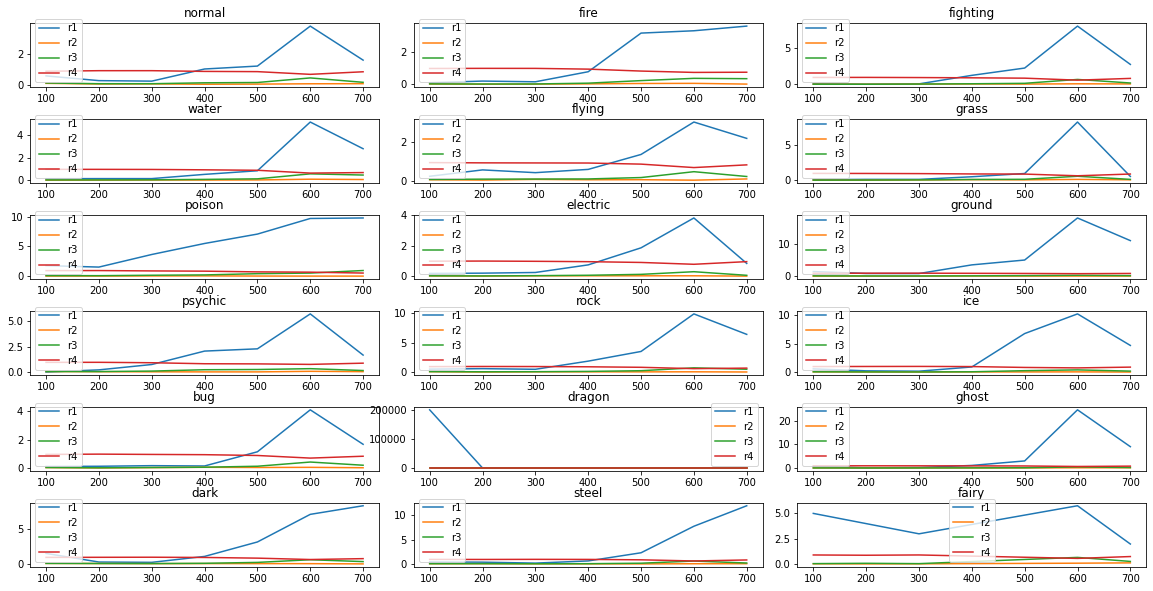

In [20]:
n_train_list = [100,200,300,400,500,600,700]
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(wspace=0.1,
                    hspace=0.5)
fig.tight_layout()
for i in range(18):
    name = type_list[i]
    r1 = []
    r2 = []
    r3 = []
    r4 = []
    plot_list = []
    for n_train in n_train_list:
        
        beta = cp.Variable(n_move)
        mid = M[:,0:n_train].T @ beta
        log_likelihood = cp.sum(cp.multiply(B[0:n_train,i], mid) - cp.logistic(mid))
        problem = cp.Problem(cp.Maximize(log_likelihood))
        if (i==17):
            solver = 'SCS'
        else:
            solver = 'ECOS'
        problem.solve(solver=solver,verbose=False)
        print('solve status',problem.status)
        if problem.status not in ["infeasible", "unbounded","infeasible_inaccurate","unbounded_inaccurate"]:
            TP,FP,TN,FN = perf_measure(B[n_train:801,i],(1+np.sign((M[:,n_train:801].T@beta).value))/2)
            r1.append(FP/(TP+1e-5))
            r2.append(FN/(TN+1e-5))
            r3.append((FP+FN)/(TP+TN+1e-5))
            r4.append((TP+TN)/(TP+TN+FP+FN+1e-5))
            plot_list.append(n_train)
    plt.subplot(6,3,i+1)
    plt.plot(plot_list,r1);
    plt.plot(plot_list,r2);
    plt.plot(plot_list,r3);
    plt.plot(plot_list,r4);
    plt.legend(labels=['r1','r2','r3','r4'],loc='best')
    plt.title(name)

plt.savefig('fool.png')

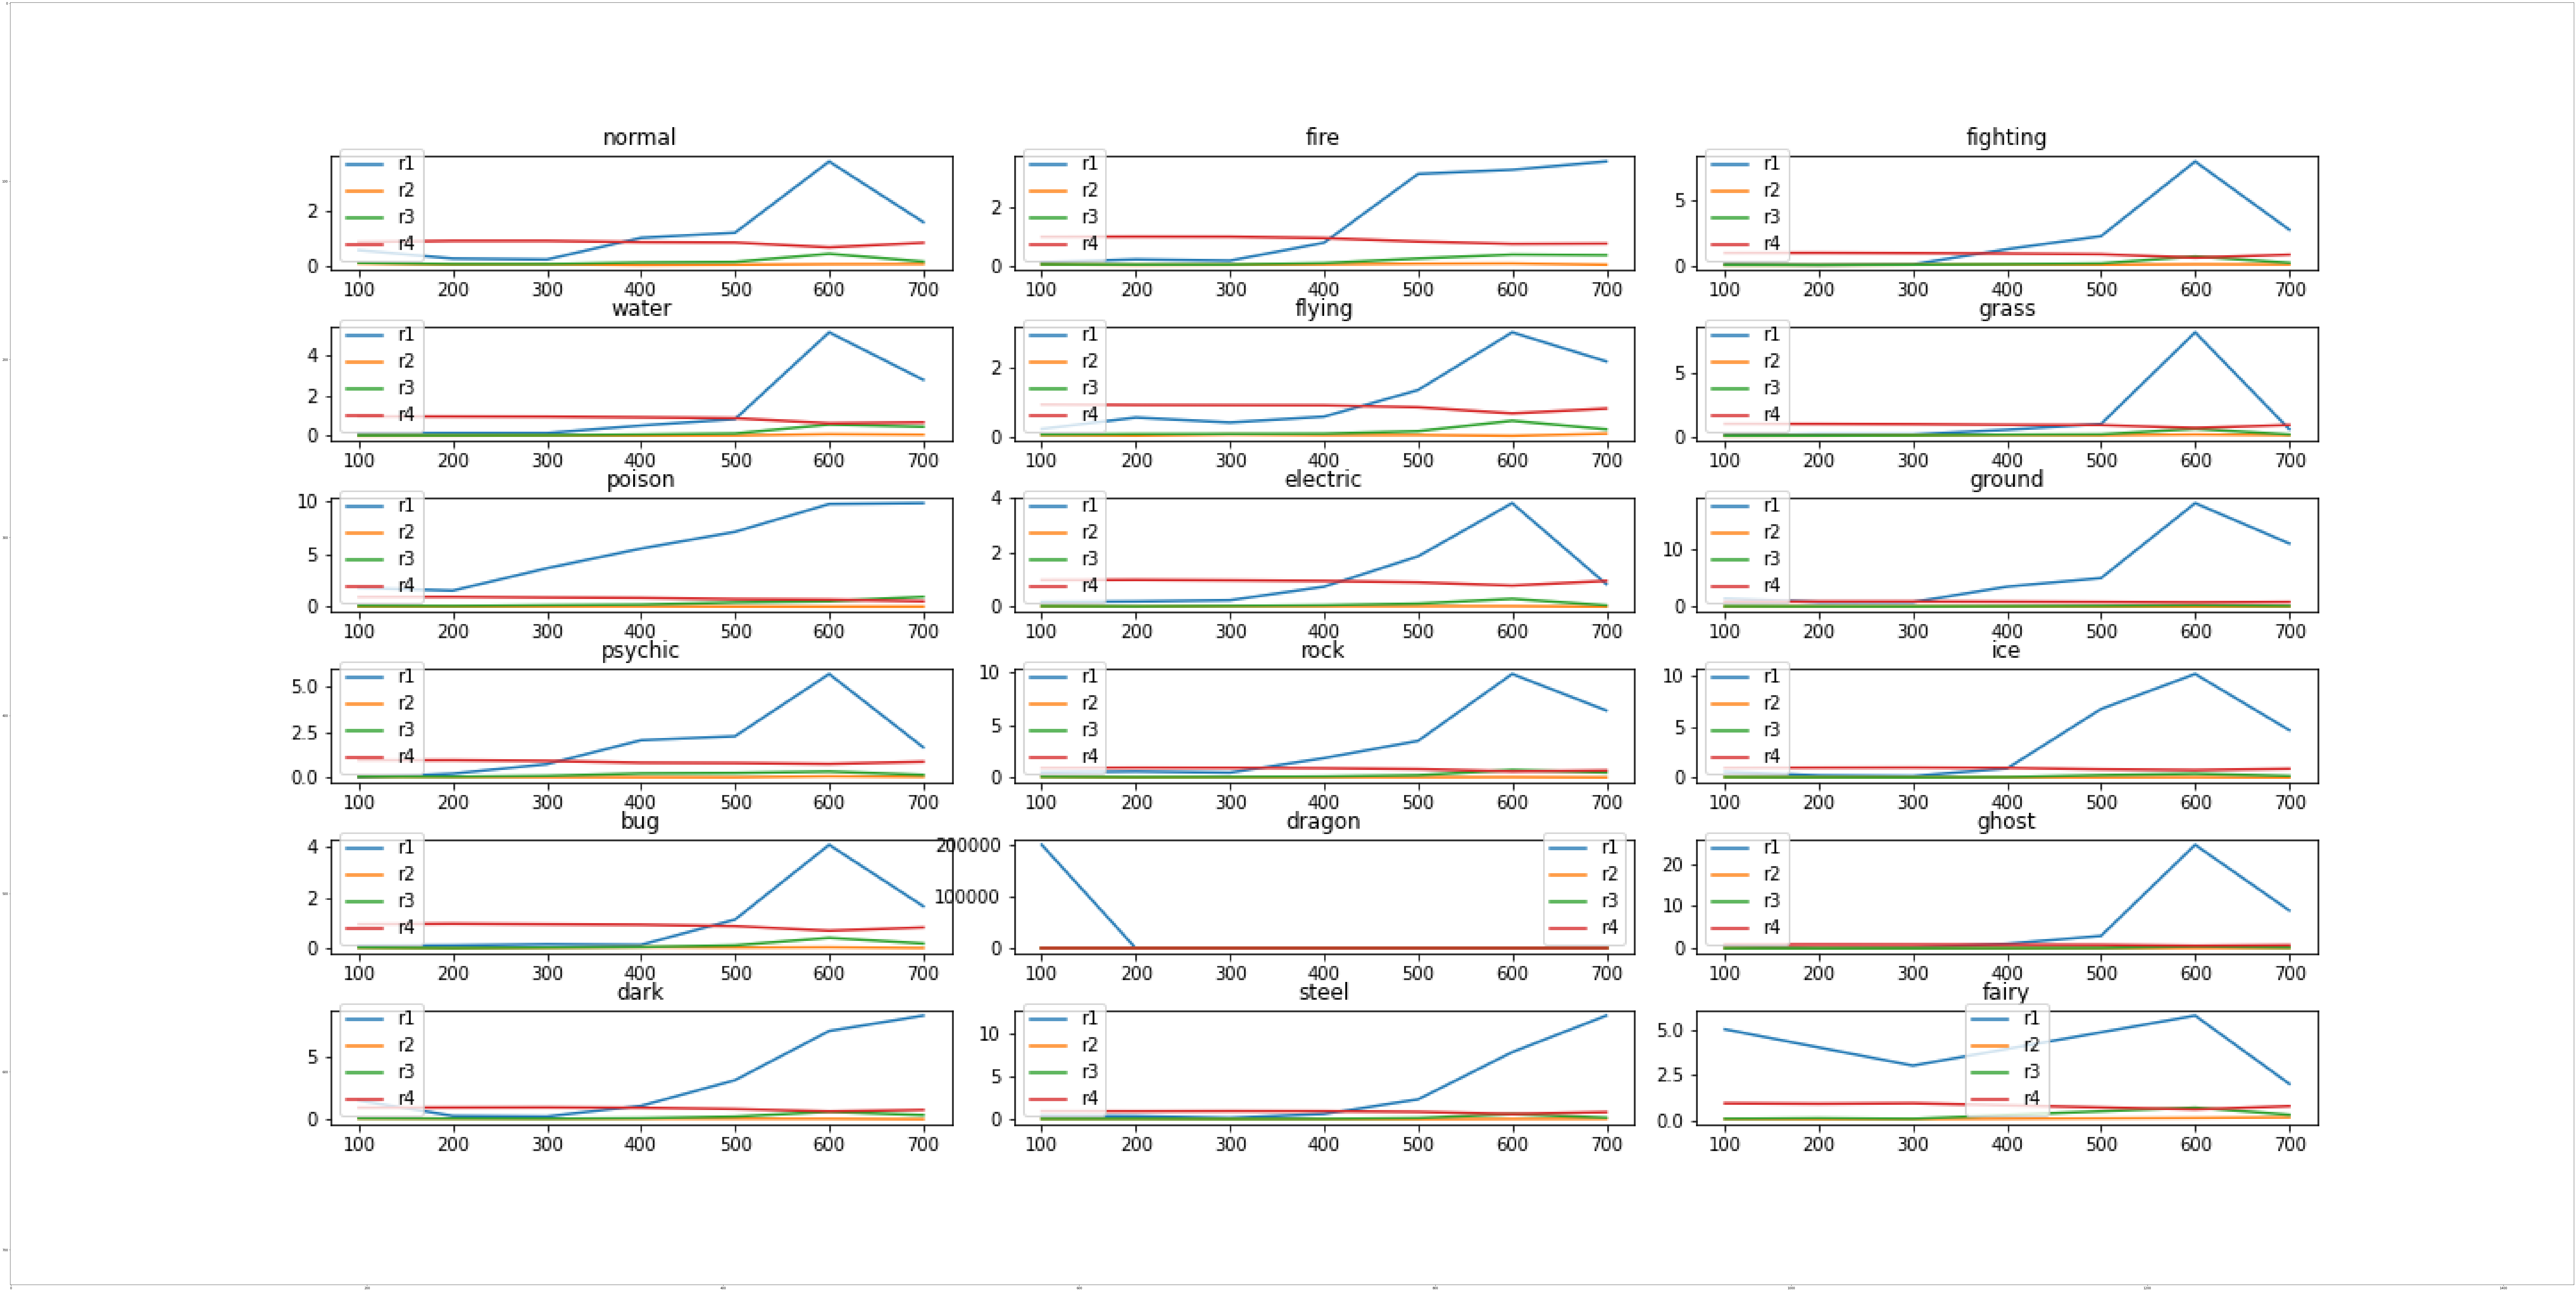

In [2]:
image = plt.imread('fool.png')
plt.figure(figsize=(150,150))
plt.imshow(image)
plt.show()

# (g) Dual-type 

I would choose the optimal training number as 500. If we choose too less samples for training, then the problem might be underfitting, while if we select too many samples, the problem would be overfitting and thus lose generalization. I would say out of 800 samples, 500 for training is a reasonable number. And also from the graph, in term of $r_3$ and $r_4$, we know at 500 they reaches a low level and then increase again at 600. Therefore, I would say 500.  After separating training and test data and splitting the test data into single and dual types. I have the following solution. In terms of $r_3$, which as discussed above is the best of three measurements or in term of $r_4$, for single-type pokemon, the classifier is more accurate; for dual-type pokemon, however, the classifier is less accurate.

In [7]:
def get_single_dual_type_test(B,n_train):
    single_list = []
    dual_list = []
    n,m = B.shape
    for i in range(n_train, 801):
        if (np.sum(B[i,:])==1):
            single_list.append(i)
        elif (np.sum(B[i,:])==2):
            dual_list.append(i)
    return single_list, dual_list

In [9]:
# choose the best
n_train = 500
single_list, dual_list = get_single_dual_type_test(B,n_train)
df_s = pd.DataFrame()
df_d = pd.DataFrame()
df = pd.DataFrame()
for i in range(18):
    name = type_list[i]
    
    beta = cp.Variable(n_move)
    mid = M[:,0:n_train].T @ beta
    log_likelihood = cp.sum(cp.multiply(B[0:n_train,i], mid) - cp.logistic(mid))
    problem = cp.Problem(cp.Maximize(log_likelihood))
    solver = 'ECOS'
    problem.solve(solver=solver,verbose=False)
    print('solve status',problem.status)
    if problem.status not in ["infeasible", "unbounded","infeasible_inaccurate","unbounded_inaccurate"]:
        
        # single type
        TP,FP,TN,FN = perf_measure(B[single_list,i],(1+np.sign((M[:,single_list].T@beta).value))/2)  
        new_row = {'name':name,'TP':TP,'TN':TN,'FP':FP,'FN':FN,'r1':FP/(TP+1e-5),'r2':FN/(TN+1e-5),
                  'r3':(FP+FN)/(TP+TN+1e-5),'r4':(TP+TN)/(TP+TN+FP+FN+1e-5)}
        df_s = df_s.append(new_row,ignore_index=True,sort=False)
        
        # dual type
        TP,FP,TN,FN = perf_measure(B[dual_list,i],(1+np.sign((M[:,dual_list].T@beta).value))/2)
        new_row = {'name':name,'TP':TP,'TN':TN,'FP':FP,'FN':FN,'r1':FP/(TP+1e-5),'r2':FN/(TN+1e-5),
                  'r3':(FP+FN)/(TP+TN+1e-5),'r4':(TP+TN)/(TP+TN+FP+FN+1e-5)}
        df_d = df_d.append(new_row,ignore_index=True,sort=False)
        
        # all_type
        TP,FP,TN,FN = perf_measure(B[n_train:801,i],(1+np.sign((M[:,n_train:801].T@beta).value))/2)
        new_row = {'name':name,'TP':TP,'TN':TN,'FP':FP,'FN':FN,'r1':FP/(TP+1e-5),'r2':FN/(TN+1e-5),
                  'r3':(FP+FN)/(TP+TN+1e-5),'r4':(TP+TN)/(TP+TN+FP+FN+1e-5)}
        df = df.append(new_row,ignore_index=True,sort=False)

solve status optimal_inaccurate
solve status optimal
solve status optimal
solve status optimal_inaccurate
solve status optimal_inaccurate
solve status optimal
solve status optimal_inaccurate
solve status optimal
solve status optimal_inaccurate
solve status optimal
solve status optimal_inaccurate
solve status optimal
solve status optimal
solve status optimal
solve status optimal
solve status optimal_inaccurate
solve status optimal
solve status optimal


## single-type pokeman

In [10]:
df_s

,FN,FP,TN,TP,name,r1,r2,r3,r4
0,5.0,12.0,110.0,11.0,normal,1.090908,0.045455,0.140496,0.876812
1,4.0,26.0,103.0,5.0,fire,5.199990,0.038835,0.277778,0.782609
2,4.0,14.0,114.0,6.0,fighting,2.333329,0.035088,0.150000,0.869565
3,1.0,16.0,106.0,15.0,water,1.066666,0.009434,0.140496,0.876812
4,0.0,11.0,126.0,1.0,flying,10.999890,0.000000,0.086614,0.920290
5,2.0,14.0,110.0,12.0,grass,1.166666,0.018182,0.131148,0.884058
6,0.0,42.0,94.0,2.0,poison,20.999895,0.000000,0.437500,0.695652
7,2.0,16.0,116.0,4.0,electric,3.999990,0.017241,0.150000,0.869565
8,1.0,18.0,117.0,2.0,ground,8.999955,0.008547,0.159664,0.862319
9,1.0,20.0,103.0,14.0,psychic,1.428570,0.009709,0.179487,0.847826


## dual-type pokemon

In [11]:
df_d

,FN,FP,TN,TP,name,r1,r2,r3,r4
0,9.0,16.0,126.0,12.0,normal,1.333332,0.071429,0.181159,0.846626
1,8.0,18.0,128.0,9.0,fire,1.999998,0.062500,0.189781,0.840491
2,10.0,13.0,134.0,6.0,fighting,2.166663,0.074627,0.164286,0.858896
3,6.0,11.0,129.0,17.0,water,0.647058,0.046512,0.116438,0.895705
4,12.0,19.0,111.0,21.0,flying,0.904761,0.108108,0.234848,0.809816
5,15.0,7.0,131.0,10.0,grass,0.699999,0.114504,0.156028,0.865031
6,2.0,43.0,108.0,10.0,poison,4.299996,0.018519,0.381356,0.723926
7,3.0,10.0,140.0,10.0,electric,0.999999,0.021429,0.086667,0.920245
8,9.0,17.0,132.0,5.0,ground,3.399993,0.068182,0.189781,0.840491
9,2.0,37.0,113.0,11.0,psychic,3.363633,0.017699,0.314516,0.760736


## for all pokemon

In [12]:
df

,FN,FP,TN,TP,name,r1,r2,r3,r4
0,14.0,28.0,236.0,23.0,normal,1.217391,0.059322,0.162162,0.860465
1,12.0,44.0,231.0,14.0,fire,3.142855,0.051948,0.228571,0.813953
2,14.0,27.0,248.0,12.0,fighting,2.249998,0.056452,0.157692,0.863787
3,7.0,27.0,235.0,32.0,water,0.843750,0.029787,0.127341,0.887043
4,12.0,30.0,237.0,22.0,flying,1.363636,0.050633,0.162162,0.860465
5,17.0,21.0,241.0,22.0,grass,0.954545,0.070539,0.144487,0.873754
6,2.0,85.0,202.0,12.0,poison,7.083327,0.009901,0.406542,0.710963
7,5.0,26.0,256.0,14.0,electric,1.857142,0.019531,0.114815,0.897010
8,10.0,35.0,249.0,7.0,ground,4.999993,0.040161,0.175781,0.850498
9,3.0,57.0,216.0,25.0,psychic,2.279999,0.013889,0.248963,0.800664


In [16]:
[df_s['r1'].mean(),df_s['r2'].mean(),df_s['r3'].mean(),df_s['r4'].mean()]

[5.277449469859531,
 0.015567466174363331,
 0.18392268873645007,
 0.8494363313612963]

In [17]:
[df_d['r1'].mean(),df_d['r2'].mean(),df_d['r3'].mean(),df_d['r4'].mean()]

[2.3610700489919934,
 0.06055746202777764,
 0.19298785120944298,
 0.8415132408069587]

In [18]:
[df['r1'].mean(),df['r2'].mean(),df['r3'].mean(),df['r4'].mean()]

[2.8768358583720914,
 0.03903234942095439,
 0.18771464470643895,
 0.8451457821841564]